<a href="https://colab.research.google.com/github/rodrigoreisbr-tech/data_science/blob/master/Limpeza_de_dados%2C_outliers_e_valores_ausentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Limpeza de dados, outliers e valores ausentes

Neste projeto, vamos focar em uma habilidade básica, mas essencial de um Cientista de Dados. Saber lidar com valores ausentes, lidar com *outliers*, transformar os dados. Essas são algumas das atividades que fazem parte do checklist de todos os projetos que executamos.

Esses processos podem ter um impacto enorme nos resultados, desde a parte da análise dos dados até os modelos de *Machine Learning*.

Aqui, veremos o que buscar entender nos dados, os passos a dar, como identificar, e tratar *outliers*, as melhores práticas e métodos para lidar com dados ausentes, e por fim, converter os dados para os formatos necessários.


## O Que Analisar?

Primeiro de tudo, precisamos entender o que são bons dados, para que saibamos os passos que precisamos tomar para ter o melhor conjunto de dados possível, a partir dos dados que estamos utilizando.

* Tipo de Dados 
  * Coluna de data em formato `datetime`, coluna de valores monetários em `float`.
* *Range* dos Dados
  * Meses de 1 a 12, dias do mês de 1 a 31.
* Dados Obrigatórios
  * Algumas colunas não podem estar vazias
* Dados Únicos
  * CPF, RG, CNPJ, ID de usuário.
* Dados Categóricos
  * Gênero Masculino ou Feminino.
* Padrões regulares
  * (61) 9 8765-4321
* Validade Entre os Campos
  * Data de saída não ser anterior à data de entrada.


In [ ]:
# importando os pacotes necessários
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# configurando a visualização
sns.set_style()
%matplotlib inline

## Os Dados

Utilizaremos mais de um conjunto de dados nesse projeto, mas o primeiro deles será do mesmo grupo usado no Projeto do Módulo 2 do curso Data Science na Prática.

Nesse projeto, analisamos dados sobre a violência no **Rio de Janeiro**.

Esse conjunto de dados é interessante pois está organizado em números de crimes por mês, desde janeiro de 1991, mas alguns dos crimes só começaram a ser registrados algum tempo depois, como veremos abaixo.

In [ ]:
# importando os dados
df = pd.read_csv('https://raw.githubusercontent.com/rodrigoreisbr-tech/data_science/master/dataset/dataset_rio_violencia.csv', sep=',')

# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

# verificando as primeiras entradas
df.head()


Dimensões do Dataset 
Variáveis:  56 
Entradas:  344


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
# verificando o final do dataset
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


In [ ]:
# modificando o tipo
df.lesao_corp_morte[343].astype('int64')

1

In [ ]:
# pandas usa floats quando tem dados ausentes
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

## Como lidar com Dados Ausentes

A resposta é: Depende!

Que tipo de dado está ausente? Em qual proporção? De forma aleatória? Todos esses são aspectos que precisamos levar em consideração ao tratar dados ausentes.

Tomando os dados do RJ como exemplo, vemos que temos algumas colunas com quase todos os dados ausentes, mas qual o motivo disso? De onde esses dados são extraídos e qual o processo de coleta deles? Dados ausentes implicam algum significado?

Nesse caso, nossa teoria mais predominante é que os dados não começaram a ser registrados até uma determinada data, e após isso, a coleta foi feita de forma efetiva.

In [ ]:
# mostrando a quantidade de dados ausentes por variável
(df.isnull().sum()).sort_values(ascending=False)

roubo_bicicleta               276
furto_bicicleta               276
apreensao_drogas_sem_autor    180
posse_drogas                  180
apf                           180
aaapai                        180
cmp                           180
trafico_drogas                180
cmba                          180
sequestro_relampago           144
furto_coletivo                144
extorsao                      144
furto_celular                 144
roubo_apos_saque              144
roubo_conducao_saque          144
roubo_cx_eletronico           144
estupro                       144
estelionato                   144
pol_civis_mortos_serv         144
pol_militares_mortos_serv     144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
lesao_corp_culposa             96
ameaca                         96
sequestro                      96
lesao_corp_morte               96
registro_ocorrencias           96
hom_por_interv_policial        84
hom_culposo   

In [ ]:
# dados ausentes por ano
df.set_index('vano').isna().sum(level=0)

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1992,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1993,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1994,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1995,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1996,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1997,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1998,0,0,12,0,0,0,0,12,0,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1999,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,0,12,12,12,0,12,12,12,0,12,12,12,12,0,12,0,12,12,12,0,0,0,0,0


In [ ]:
# visualizando
df[273:300]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
273,2013,10,377,3.0,12,38.0,441,7508,520.0,184.0,4142.0,546,120,2639,295,5531,579,1,4.0,529.0,8.0,169.0,NaN,1101,11522,1588,2659,934.0,1497.0,NaN,8718,15396,0.0,168.0,5.0,3139.0,2141,937.0,999.0,262.0,2077,3099.0,1091.0,1674.0,52.0,7117.0,497.0,41,5.0,2.0,1.0,430,6639,2639,68030.0,3
274,2013,11,414,2.0,13,31.0,420,7278,467.0,189.0,4116.0,609,127,2644,309,5355,542,2,4.0,473.0,12.0,142.0,NaN,1101,11320,1441,2514,839.0,1372.0,NaN,7921,14087,1.0,152.0,14.0,2645.0,1836,759.0,903.0,221.0,1906,2838.0,969.0,1662.0,36.0,6870.0,443.0,45,4.0,2.0,0.0,460,6370,2644,63796.0,3
275,2013,12,461,5.0,17,43.0,532,8207,408.0,195.0,4184.0,661,117,2893,420,5667,523,1,2.0,436.0,11.0,122.0,NaN,1108,11961,1498,2687,902.0,1290.0,NaN,8189,14566,0.0,151.0,7.0,2678.0,1841,727.0,933.0,216.0,1867,2763.0,973.0,1131.0,37.0,7452.0,483.0,41,6.0,0.0,0.0,526,6626,2893,65609.0,3
276,2014,1,464,3.0,15,50.0,557,9050,555.0,194.0,4064.0,774,126,3206,489,6625,662,6,4.0,473.0,9.0,121.0,0.0,1275,13770,1638,3268,938.0,1538.0,0.0,9880,17262,0.0,178.0,31.0,3017.0,2356,1160.0,1012.0,219.0,2342,3095.0,1091.0,1494.0,47.0,9034.0,628.0,66,3.0,0.0,0.0,532,7760,3206,75403.0,3
277,2014,2,482,5.0,16,56.0,543,8093,555.0,166.0,3787.0,728,140,3025,418,6555,621,4,5.0,461.0,14.0,123.0,0.0,1167,13261,1484,3274,940.0,1349.0,0.0,8809,15856,0.0,154.0,18.0,2873.0,2126,904.0,1021.0,234.0,2167,3095.0,1114.0,1289.0,58.0,8049.0,520.0,63,3.0,1.0,0.0,559,7637,3025,69434.0,3
278,2014,3,510,5.0,10,46.0,544,8357,479.0,214.0,3938.0,773,125,2947,401,7014,639,2,4.0,555.0,16.0,94.0,0.0,1141,13711,1640,4564,974.0,1577.0,0.0,9248,18003,1.0,175.0,17.0,2745.0,2046,871.0,1002.0,228.0,2355,3154.0,1077.0,1533.0,60.0,8154.0,563.0,59,2.0,5.0,0.0,571,8208,2947,72915.0,3
279,2014,4,449,1.0,17,37.0,559,7484,469.0,194.0,3638.0,758,120,3073,371,6777,657,3,5.0,554.0,9.0,142.0,0.0,1239,13708,1498,2612,939.0,1124.0,0.0,8229,14402,0.0,129.0,14.0,2700.0,2161,885.0,1077.0,250.0,2426,3105.0,1001.0,1700.0,73.0,7440.0,532.0,41,3.0,1.0,0.0,504,7988,3073,67358.0,3
280,2014,5,444,3.0,8,53.0,505,6249,442.0,161.0,3941.0,728,139,3073,520,7033,571,1,4.0,573.0,9.0,111.0,0.0,1168,13930,1510,2576,876.0,1153.0,0.0,8116,14231,0.0,163.0,17.0,2864.0,2086,900.0,975.0,251.0,2495,2884.0,817.0,1929.0,67.0,6689.0,451.0,32,3.0,2.0,0.0,508,8177,3073,66175.0,3
281,2014,6,377,1.0,18,45.0,503,7229,429.0,185.0,3831.0,649,104,2635,386,6716,565,0,2.0,616.0,6.0,88.0,0.0,1046,12813,1391,2952,782.0,1198.0,0.0,8738,15061,0.0,134.0,13.0,2793.0,2040,923.0,912.0,235.0,2003,2704.0,735.0,1511.0,59.0,6843.0,447.0,25,3.0,2.0,0.0,441,7897,2635,65397.0,3
282,2014,7,370,4.0,14,57.0,439,6070,442.0,156.0,3573.0,650,95,2479,442,7196,592,2,1.0,647.0,14.0,136.0,0.0,1110,13364,1456,3248,1023.0,1287.0,0.0,9338,16352,0.0,125.0,6.0,3146.0,2220,966.0,1013.0,286.0,2105,2741.0,798.0,2109.0,83.0,6376.0,429.0,38,2.0,2.0,0.0,445,8435,2479,67615.0,3


## Tratando os Dados

No caso desse conjunto de dados específico, o ideal é analisar os dados apenas do período em que se tem dados. Especialmente em algumas variáveis onde o volume é muito grande, qualquer tipo de preenchimento poderia enviesar os dados de forma que a análise deixasse de ser relevante.

Para outros casos, podemos considerar as seguintes hipóteses:

* Excluir
  * Se os dados ausentes estão em pequeno número,ocorrem aleatoriamente, e a ausência não carrega significado, é melhor excluir a linha. No caso da coluna, se ainda for possível analisar alguma parte dela, use-a, como é o caso aqui. Mas para algumas situações, o ideal é excluir a coluna.

* Preencher
  * Preencher as entradas com dados ausentes com valores estatísticos como a média, mediana, moda ou zeros.
  * A média é mais útil quando a distribuição dos dados é normal. Em dados com distribuição mais enviesada (*skewed*), a mediana é uma solução mais robusta, pois ela é menos sensível a outliers.
  * Uma `Regressão Linear` também pode ser útil, apesar de sensível a outliers, podem nos ajudar a inserir valores que nos ajudem.
  * Indetificar a entrada ausente com algum valor que indique isso pode ser mais informativo, quando a ausência representa valor. Por exemplo, em dados numéricos preencher com zero, e em categóricos criar uma categoria "Desconhecido". Atenção, pois os zeros não podem ser levados em consideração em análises estatísticas.

## Tratando Outliers

*Outliers* são pontos discrepantes, que estão destoando do padrão do conjunto de dados.

É muito importante conseguir identificar e tratar esses outliers, pois eles podem nos mostrar uma imagem incorreta dos nossos dados.

Podemos identificar um outlier de diversas formas, entre elas podemos citar:

* IQR Score
* Boxplots
* Scatter plots
* Z-Score

Vamos ver na prática o processo completo de limpeza de dados, tratando dados ausentes, convertendo os dados para o formato correto, e tratando dos outliers.

## Airbnb - Vancouver

Para esse estudo, faremos o tratamento dos dados do Airbnb referentes à cidade de Vancouver.


In [ ]:
# importando os dados
df_nyc = pd.read_csv('https://raw.githubusercontent.com/rodrigoreisbr-tech/data_science/master/dataset/nyc.csv', index_col=0)

# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df_nyc.shape[1], "\n"
      'Entradas: ', df_nyc.shape[0])

# verificando as primeiras entradas
df_nyc.head()

Dimensões do Dataset 
Variáveis:  16 
Entradas:  49530


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.37,2,335
2,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,322,2020-06-07,4.64,1,276
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365


In [ ]:
# verificando os tipos
df_nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
# transformando as colunas
df_nyc[['price','latitude', 'longitude']] = df_nyc[['price','latitude', 'longitude']].astype('object')
# verificando o resultado;l
df_nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                           object
longitude                          object
room_type                          object
price                              object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
# verificando dados ausentes
(df_nyc.isnull().sum()).sort_values(ascending=False)

availability_365                  0
calculated_host_listings_count    0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
host_name                         0
host_id                           0
name                              0
id                                0
dtype: int64

Seguindo o que falamos anteriormente, colunas com baixo poder preditivo e grande quantidade de dados faltantes podem ser excluídas.

Em relação às outras entradas, estão em poucas entradas, não parecem ter algum tipo de relação entre elas, e não parecem ter grande poder preditivo. Mais uma vez, vamos fazer a exclusão. Porém, aqui vamos excluir as entradas.

In [ ]:
# excluindo colunas com dados faltantes
df_nyc.drop(columns=['reviews_per_month', 'last_review'], inplace=True)

# excluindo entradas com dados faltantes
df_nyc.dropna(axis=0, inplace=True)

# convertendo os tipos de dados
df_nyc[['price','latitude', 'longitude']] = df_nyc[['price','latitude', 'longitude']].astype('float')

KeyError: ignored

Feita a limpeza, é hora de conferir os resultados.

In [ ]:
# verificando o resultado
(df_nyc.isnull().sum()).sort_values(ascending=False)

availability_365                  0
calculated_host_listings_count    0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
host_name                         0
host_id                           0
name                              0
id                                0
dtype: int64

## Limpando Outliers

Para tratar dos outliers desse conjunto de dados, iremos analisar a distribuição estatística, plotar boxplots e calcular os limites utilizando a regra do IQR Score.

Primeiramente, vamos lembrar o que é o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

# IQR = Q3 - Q1

Vamos dar uma olhada nos nossos dados e ver o que identificamos.

In [ ]:
# verificando a distribuição estatística
df_nyc.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,49506.0,49506.0,49506.0,49506.0,49506.0,49506.0,49506.0,49506.0,49506.0
mean,22965296.4,85118900.5,40.7,-74.0,162.7,8.2,23.9,6.2,126.7
std,13525679.1,98890478.7,0.1,0.0,419.4,21.5,48.3,25.5,142.4
min,2060.0,2259.0,40.5,-74.2,0.0,1.0,0.0,1.0,0.0
25%,10875806.0,9268318.2,40.7,-74.0,68.0,2.0,1.0,1.0,0.0
50%,22338936.0,38016083.0,40.7,-74.0,101.0,3.0,5.0,1.0,79.0
75%,35578705.0,137358866.0,40.8,-73.9,175.0,6.0,23.0,2.0,267.0
max,43703359.0,349082641.0,40.9,-73.7,10000.0,1250.0,746.0,280.0,365.0


Aqui, algumas coisas já chamam a nossa atenção, como por exemplo:

* A variável `price` tem o mínimo em 0.
* Lembrando que a variável `price` trata do preço da diária dos imóveis em moeda local (USD), estamos vendo que o Q3 está em 175 dólares, mas o máximo está em 10 mil dórales. Claramente, há outliers por aqui.
* A variável `minimum_nights` tem como seu máximo o valor 1250, sendo que o Q3 está em 6. Claramente temos outliers nessa variável.
* As variáveis `number_of_reviews`, `calculated_host_listings_count` e `availability_365` também podem conter outliers, mas não vamos nos preocupar com elas agora.

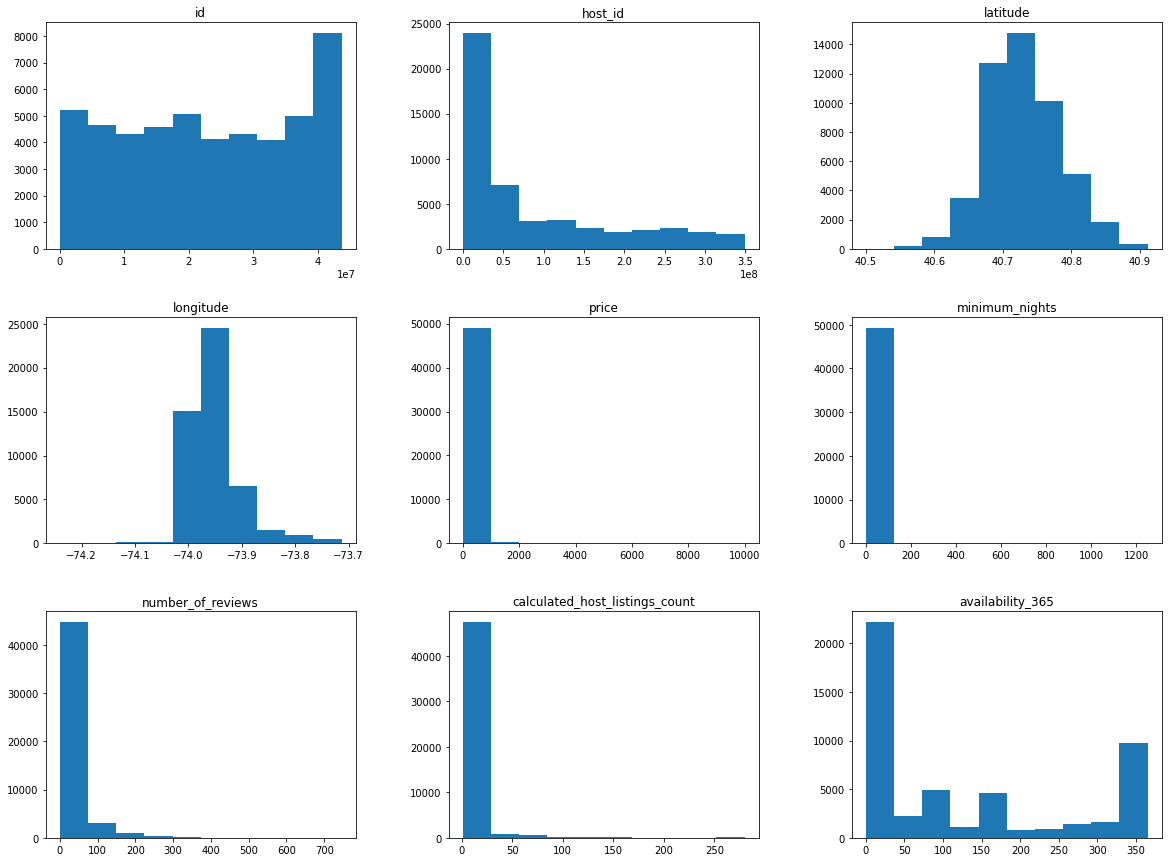

In [ ]:
# verificando as distribuições
df_nyc.hist(figsize=(20,15), grid=False);

Verificando os histogramas, conseguimos ver claramente que temos outliers presentes. Para tratá-los vamos seguir os seguintes passos:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.


In [ ]:
# identificando os outliers para a variável price
q1_price = df_nyc.price.quantile(.25)
q3_price = df_nyc.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)


IQR da variável price:  107.0
Limite superior de price:  335.5
Limite inferior de price:  -92.5


Aqui podemos ver que, apesar de não termos outliers na parte inferior, continuamos tendo valores iguais a zero, que precisam ser tratados.

Vamos plotar um boxplot para visualizarmos a diferença feita pela limpeza.

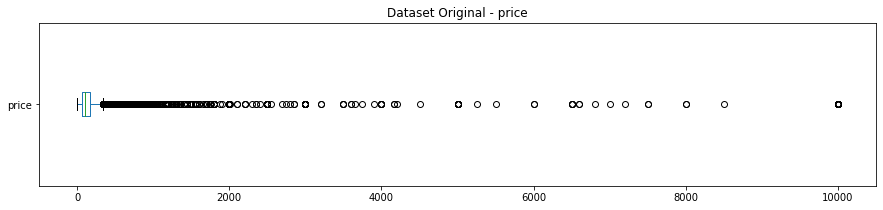

O dataset possui 49506 colunas
2913 Entradas acima de 335.5
Representam 5.88% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df_nyc.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df_nyc.shape[0]))
print("{} Entradas acima de 335.5".format(len(df_nyc[df_nyc.price > 335.5])))
print("Representam {:.2f}% do dataset".format((len(df_nyc[df_nyc.price > 335.5]) / df_nyc.shape[0])*100))

In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df_nyc.minimum_nights.quantile(.25)
q3_minimum_nights = df_nyc.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  4.0
Limite superior de minimum_nights:  12.0
Limite inferior de minimum_nights:  -4.0


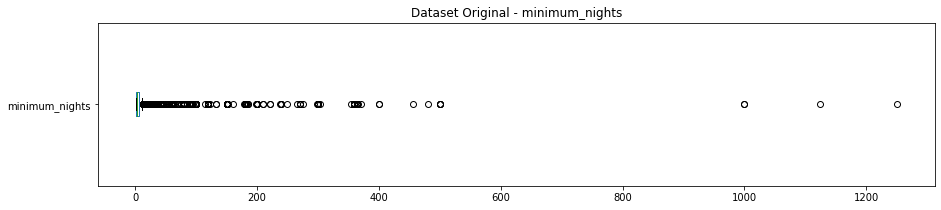

O dataset possui 49506 colunas
8473 Entradas acima de 335.5
Representam 17.12% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df_nyc.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df_nyc.shape[0]))
print("{} Entradas acima de 335.5".format(len(df_nyc[df_nyc.minimum_nights > 12.0])))
print("Representam {:.2f}% do dataset".format((len(df_nyc[df_nyc.minimum_nights > 12.0]) / df_nyc.shape[0])*100))

In [ ]:
# limpando o dataset
df_clean = df_nyc.copy()

df_clean.drop(df_clean[df_clean.price > 335.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 4].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df_nyc.shape)
print('Shape após a limpeza: ',df_clean.shape)


Shape antes da limpeza:  (49506, 14)
Shape após a limpeza:  (31868, 14)


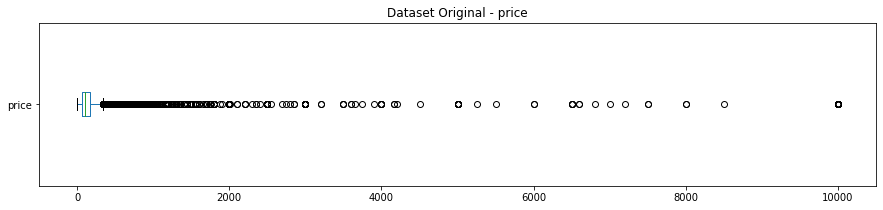

O dataset possui 49506 colunas
2913 Entradas acima de 335.5
Representam 5.88% do dataset


In [ ]:
# plotando novamente o boxplot original
fig, ax = plt.subplots(figsize=(15,3))
df_nyc.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df_nyc.shape[0]))
print("{} Entradas acima de 335.5".format(len(df_nyc[df_nyc.price > 335.5])))
print("Representam {:.2f}% do dataset".format((len(df_nyc[df_nyc.price > 335.5]) / df_nyc.shape[0])*100))


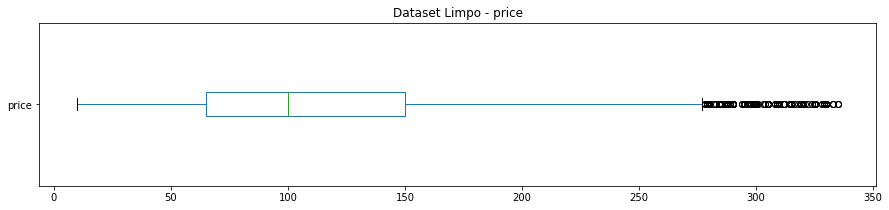

Tamanho original: 49506 colunas
Tamanho atual: 31868 colunas


In [ ]:
# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} colunas".format(df_nyc.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0]))

Aqui podemos ver o resultado da limpeza.

O boxplot mostra alguns dados como outliers, entretanto, esses estão sendo calculados em relação ao novo dataset, e nossa limpeza levou em consideração os quartis do dado original.

Para garantirmos que não estamos lidando com outliers que vão prejudicar nossa análise, vamos checar os histogramas novamente.


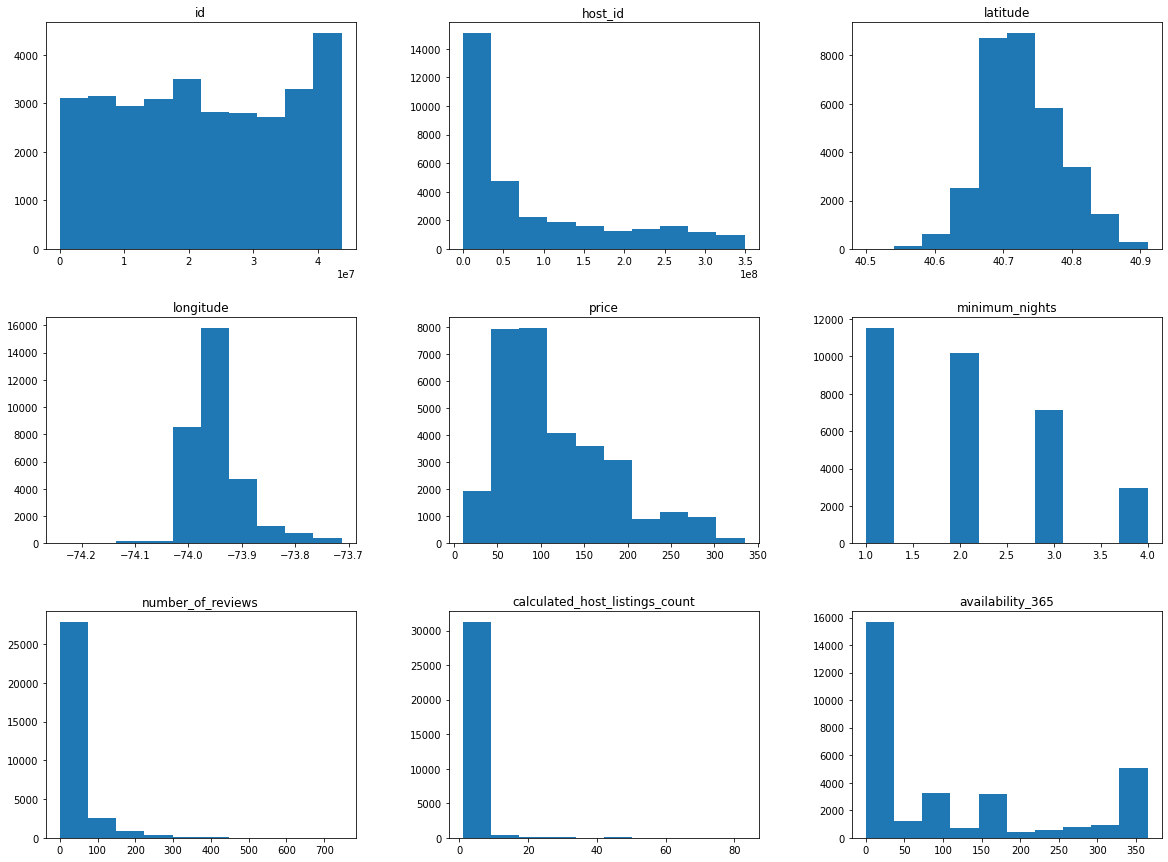

In [ ]:
# verificando as distribuições
df_clean.hist(figsize=(20,15), grid=False);

In [ ]:
# verificando a distribuição estatística dos dados limpos
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,31868.0,31868.0,31868.0,31868.0,31868.0,31868.0,31868.0,31868.0,31868.0
mean,22513849.8,85306764.8,40.7,-73.9,116.8,2.0,29.8,2.0,111.8
std,13121677.7,97742593.6,0.1,0.1,66.0,1.0,54.4,3.4,136.0
min,2060.0,2259.0,40.5,-74.2,10.0,1.0,0.0,1.0,0.0
25%,10807253.5,10087755.8,40.7,-74.0,65.0,1.0,1.0,1.0,0.0
50%,21963501.5,39492841.0,40.7,-74.0,100.0,2.0,7.0,1.0,42.0
75%,34595896.2,138782186.0,40.8,-73.9,150.0,3.0,33.0,2.0,180.0
max,43703359.0,349078564.0,40.9,-73.7,335.0,4.0,746.0,83.0,365.0


Agora conseguimos ter uma ideia bem melhor da distribuição dos nossos dados.

Alguns destaques:

* A mediana da variável `price` foi pouquíssimo afetada pela limpeza dos outliers, mostrando mais uma vez a robustez desse atributo como solução para dados ausentes.
* Agora, temos dados que respeitam as regras definidas no início do notebook, onde vimos o que são bons dados.
* A média da variável `price` foi reduzida drásticamente, enfatizando a sensibilidade desse atributo em relação aos outliers.

## Informações Importantes

* Modelos lineares são mais sensíveis aos outliers. Ao trabalhar com modelos desse tipo é essencial que o trabalho com outliers seja feito com bastante atenção. (Linear Regression, Logistic Regression)

* Modelos baseados em árvores de decisão são menos sensívels a outliers. (Decision Trees, Random Forest, SVM, KNN)

* Técnicas de pré-processamento como Normalização e Padronização ajudam em relação aos outliers.